In [3]:
using Pkg
Pkg.develop(url="https://github.com/StingraySoftware/Stingray.jl")
Pkg.add(["Random", "Plots"])

     Cloning git-repo `https://github.com/StingraySoftware/Stingray.jl`
Path `C:\Users\asus4\.julia\dev\Stingray` exists and looks like the correct repo. Using existing path.
   Resolving package versions...
  No Changes to `C:\Users\asus4\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\asus4\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
   Installed JpegTurbo_jll ──────────────── v3.1.1+0
   Installed LoggingExtras ──────────────── v1.1.0
   Installed Libmount_jll ───────────────── v2.40.3+0
   Installed GR_jll ─────────────────────── v0.73.13+0
   Installed libfdk_aac_jll ─────────────── v2.0.3+0
   Installed RelocatableFolders ─────────── v1.0.1
   Installed Opus_jll ───────────────────── v1.3.3+0
   Installed Xorg_xkbcomp_jll ───────────── v1.4.6+1
   Installed libdecor_jll ───────────────── v0.2.2+0
   Installed Unitful ────────────────────── v1.22.0
   Installed Contour ────────────────────── v0.6.3
   Installed x265_jll ─────────────

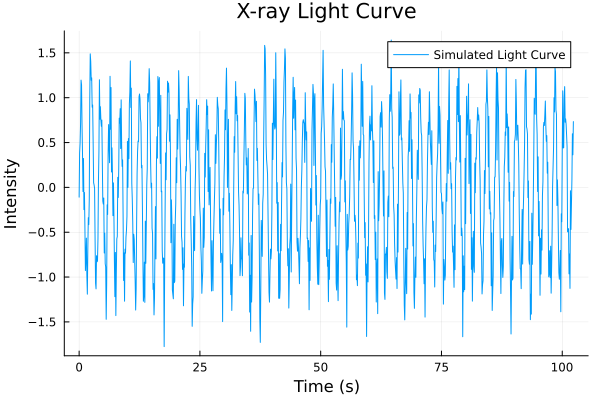

In [14]:
using Stingray, Random, Plots

# Generate Simulated Light Curve
N = 1024  # Number of data points
t = collect(0:0.1:(N-1)*0.1)  # Time array
Random.seed!(42)
light_curve = sin.(2π * 0.5 .* t) + 0.3 * randn(N)  # Sine wave + noise

# Plot Light Curve
plot(t, light_curve, label="Simulated Light Curve", xlabel="Time (s)", ylabel="Intensity", title="X-ray Light Curve", legend=:topright)

In [10]:
Pkg.add(["FITSIO", "StatsBase"])

   Resolving package versions...
    Updating `C:\Users\asus4\.julia\environments\v1.11\Project.toml`
⌃ [2913bbd2] + StatsBase v0.33.21
  No Changes to `C:\Users\asus4\.julia\environments\v1.11\Manifest.toml`


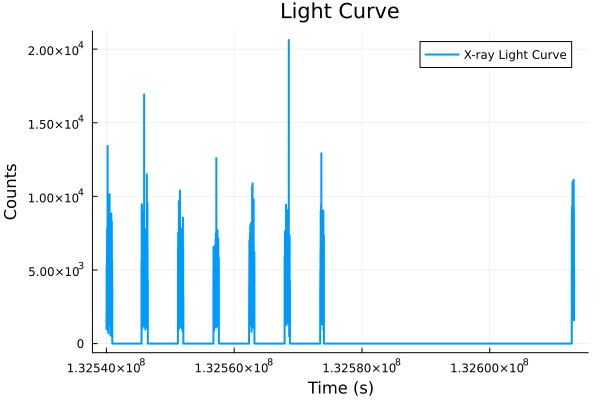

In [12]:
using FITSIO, Plots, StatsBase
# Load the event file
event_file = "ni1200120104_0mpu7_cl.evt.gz"
f = FITS(event_file)

# Extract photon arrival times
time = read(f[2], "TIME")

# Define time bin size
dt = 1.0  # Bin size in seconds

# Compute histogram for binning counts
t_min, t_max = minimum(time), maximum(time)
edges = collect(t_min:dt:t_max)

# Use StatsBase.histogram to count events in each bin
hist_data = fit(Histogram, time, edges)

# Extract counts and bin centers
counts = hist_data.weights
bin_centers = edges[1:end-1] .+ dt / 2  # Middle of each bin

# Plot the light curve
plot(bin_centers, counts, label="X-ray Light Curve", xlabel="Time (s)", ylabel="Counts", title="Light Curve", lw=2, legend=:topright)


LoadError: LoadError: UndefVarError: `@resumable` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
Hint: a global variable of this name may be made accessible by importing ResumableFunctions in the current active module Main
in expression starting at C:\Users\asus4\Desktop\julia_notebokk\fourier.jl:198
in expression starting at C:\Users\asus4\Desktop\julia_notebokk\fourier.jl:198